In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

## Logistic Regression

In [5]:
dataset = pd.read_csv('C:/Users/dell/Downloads/titanic_train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset.shape

(891, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


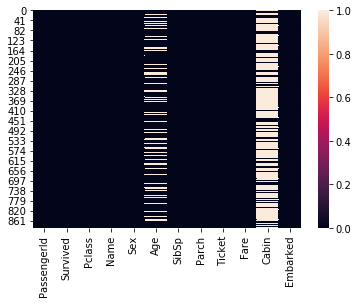

In [8]:
sb.heatmap(dataset.isnull())

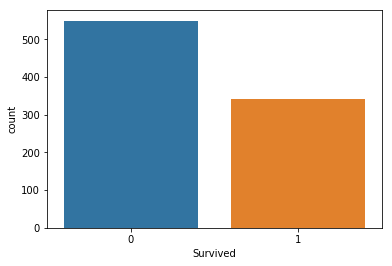

In [9]:
sb.countplot(x='Survived',data=dataset)

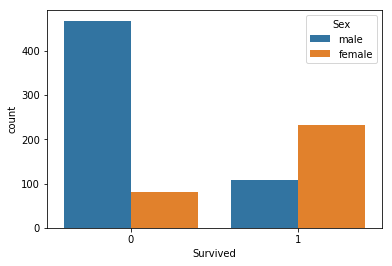

In [10]:
sb.countplot(x='Survived',hue='Sex',data=dataset)

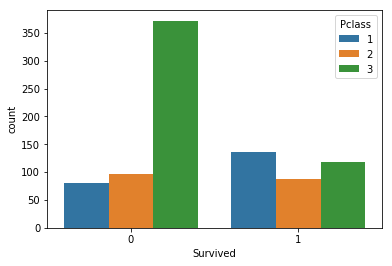

In [11]:
sb.countplot(x='Survived',hue='Pclass',data=dataset)

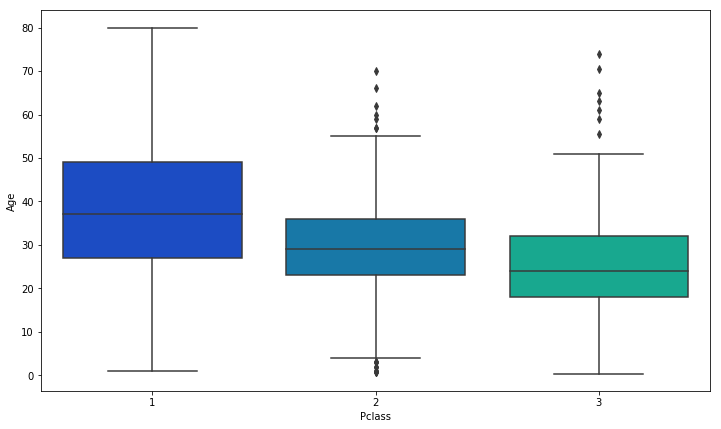

In [12]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass', y='Age', data=dataset,palette='winter')

In [13]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [14]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

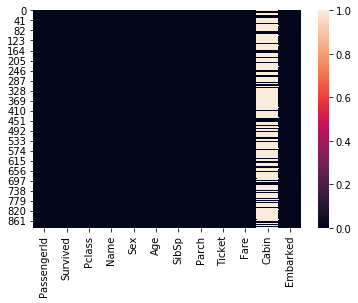

In [15]:
sb.heatmap(dataset.isnull())

In [16]:
dataset.drop('Cabin',axis=1,inplace=True)

In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [18]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [19]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)


In [20]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [21]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(dataset.drop('Survived',axis=1),dataset['Survived'],
                                                 test_size=0.20,random_state=101)


In [23]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)
print(predictions)
Y_test.head(5)

[0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0
 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0]


331    0
700    1
748    0
751    1
481    0
Name: Survived, dtype: int64

  ## Feature Scaling

In [25]:
X=dataset.iloc[:,:-1].values
X[:,2]

array([ 22.  ,  38.  ,  26.  ,  35.  ,  35.  ,  24.  ,  54.  ,   2.  ,
        27.  ,  14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  14.  ,  55.  ,
         2.  ,  29.  ,  31.  ,  24.  ,  35.  ,  34.  ,  15.  ,  28.  ,
         8.  ,  38.  ,  24.  ,  19.  ,  24.  ,  24.  ,  40.  ,  37.  ,
        24.  ,  66.  ,  28.  ,  42.  ,  24.  ,  21.  ,  18.  ,  14.  ,
        40.  ,  27.  ,  24.  ,   3.  ,  19.  ,  24.  ,  24.  ,  24.  ,
        24.  ,  18.  ,   7.  ,  21.  ,  49.  ,  29.  ,  65.  ,  37.  ,
        21.  ,  28.5 ,   5.  ,  11.  ,  22.  ,  38.  ,  45.  ,   4.  ,
        37.  ,  24.  ,  29.  ,  19.  ,  17.  ,  26.  ,  32.  ,  16.  ,
        21.  ,  26.  ,  32.  ,  25.  ,  24.  ,  24.  ,   0.83,  30.  ,
        22.  ,  29.  ,  24.  ,  28.  ,  17.  ,  33.  ,  16.  ,  24.  ,
        23.  ,  24.  ,  29.  ,  20.  ,  46.  ,  26.  ,  59.  ,  24.  ,
        71.  ,  23.  ,  34.  ,  34.  ,  28.  ,  24.  ,  21.  ,  33.  ,
        37.  ,  28.  ,  21.  ,  24.  ,  38.  ,  24.  ,  47.  ,  14.5 ,
      

In [26]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
labelencoder_X=LabelEncoder()
X[:,2]=labelencoder_X.fit_transform(X[:,2])
X[:,2]

array([ 28.,  51.,  34.,  47.,  47.,  31.,  69.,   6.,  35.,  18.,   8.,
        74.,  25.,  52.,  18.,  70.,   6.,  38.,  41.,  31.,  47.,  45.,
        20.,  36.,  12.,  51.,  31.,  24.,  31.,  31.,  53.,  50.,  31.,
        82.,  36.,  56.,  31.,  27.,  23.,  18.,  53.,  35.,  31.,   7.,
        24.,  31.,  31.,  31.,  31.,  23.,  11.,  27.,  64.,  38.,  81.,
        50.,  27.,  37.,   9.,  15.,  28.,  51.,  59.,   8.,  50.,  31.,
        38.,  24.,  22.,  34.,  42.,  21.,  27.,  34.,  42.,  33.,  31.,
        31.,   3.,  39.,  28.,  38.,  31.,  36.,  22.,  44.,  21.,  31.,
        29.,  31.,  38.,  25.,  61.,  34.,  75.,  31.,  85.,  29.,  45.,
        45.,  36.,  31.,  27.,  44.,  50.,  36.,  27.,  31.,  51.,  31.,
        62.,  19.,  28.,  25.,  22.,  27.,  84.,  38.,  31.,   6.,  27.,
        31.,  43.,  43.,  69.,  16.,  31.,  31.,  31.,  59.,  44.,  25.,
        62.,  38.,  33.,  29.,  24.,  50.,  21.,  31.,  31.,  28.,  31.,
        24.,  23.,  24.,  35.,  13.,  49.,  56.,  6

In [27]:
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,0]

array([ 0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [28]:
X

array([[  0.    ,   3.    ,  28.    , ...,   7.25  ,   1.    ,   0.    ],
       [  1.    ,   1.    ,  51.    , ...,  71.2833,   0.    ,   0.    ],
       [  1.    ,   3.    ,  34.    , ...,   7.925 ,   0.    ,   0.    ],
       ..., 
       [  0.    ,   3.    ,  31.    , ...,  23.45  ,   0.    ,   0.    ],
       [  1.    ,   1.    ,  34.    , ...,  30.    ,   1.    ,   0.    ],
       [  0.    ,   3.    ,  42.    , ...,   7.75  ,   1.    ,   1.    ]])

In [29]:
pd.concat((X_test,Y_test), axis=1)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
331,1,45.5,0,0,28.5000,1,0,1,0
700,1,18.0,1,0,227.5250,0,0,0,1
748,1,19.0,1,0,53.1000,1,0,1,0
751,3,6.0,0,1,12.4750,1,0,1,1
481,2,29.0,0,0,0.0000,1,0,1,0
845,3,42.0,0,0,7.5500,1,0,1,0
740,1,37.0,0,0,30.0000,1,0,1,1
287,3,22.0,0,0,7.8958,1,0,1,0
669,1,37.0,1,0,52.0000,0,0,1,1
241,3,24.0,1,0,15.5000,0,1,0,1


In [36]:
print(dataset.groupby('Survived').size())

Survived
0    549
1    342
dtype: int64


## KNN (K-Nearest Neighbors)

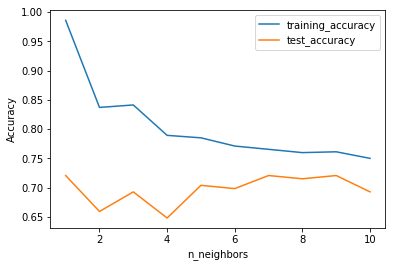

In [26]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train,Y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train,Y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test,Y_test))
plt.plot(neighbors_settings, training_accuracy, label='training_accuracy')
plt.plot(neighbors_settings, test_accuracy, label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.savefig('knn_compare_model')

In [27]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(X_train, Y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [28]:
knn.score(X_test,Y_test)

0.72067039106145248

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,Y_train)

GaussianNB(priors=None)

In [30]:
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [31]:
classifier.score(X_test,Y_test)

0.79329608938547491

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[86 13]
 [24 56]]
             precision    recall  f1-score   support

          0       0.78      0.87      0.82        99
          1       0.81      0.70      0.75        80

avg / total       0.80      0.79      0.79       179



## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)

In [34]:
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(Y_test,Y_pred))

Accuracy: 0.804469273743


## Support Vector Machine

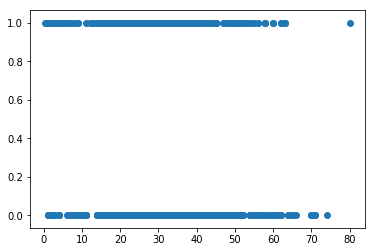

In [55]:

plt.scatter(dataset['Age'],dataset['Survived'])

In [51]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
Y_pred = clf.predict(X_test)
Y_pred 

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [52]:
clf.support_vectors_

array([[  2.  ,  23.  ,   0.  , ...,   1.  ,   0.  ,   1.  ],
       [  3.  ,  24.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       [  3.  ,  30.  ,   1.  , ...,   0.  ,   0.  ,   1.  ],
       ..., 
       [  3.  ,   0.75,   2.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  49.  ,   1.  , ...,   1.  ,   0.  ,   0.  ],
       [  3.  ,  32.  ,   0.  , ...,   1.  ,   0.  ,   1.  ]])

In [53]:
len(clf.support_vectors_)

316

In [54]:
clf.score(X_test,Y_test)

0.79329608938547491